In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [22]:
fp = open('../../Datasets/Social_Network_Ads.csv')
lines = fp.readlines()
X = []
for line in lines[1:]:
    line = line[:-1]
    data = line.split(',')
    data[0] = int(data[0])
    data[2] = int(data[2])
    data[3] = int(data[3])
    data[4] = int(data[4])
    X.append(data)
    
fp.close()

[[15624510, 'Male', 19, 19000, 0], [15810944, 'Male', 35, 20000, 0], [15668575, 'Female', 26, 43000, 0], [15603246, 'Female', 27, 57000, 0], [15804002, 'Male', 19, 76000, 0], [15728773, 'Male', 27, 58000, 0], [15598044, 'Female', 27, 84000, 0], [15694829, 'Female', 32, 150000, 1], [15600575, 'Male', 25, 33000, 0], [15727311, 'Female', 35, 65000, 0], [15570769, 'Female', 26, 80000, 0], [15606274, 'Female', 26, 52000, 0], [15746139, 'Male', 20, 86000, 0], [15704987, 'Male', 32, 18000, 0], [15628972, 'Male', 18, 82000, 0], [15697686, 'Male', 29, 80000, 0], [15733883, 'Male', 47, 25000, 1], [15617482, 'Male', 45, 26000, 1], [15704583, 'Male', 46, 28000, 1], [15621083, 'Female', 48, 29000, 1], [15649487, 'Male', 45, 22000, 1], [15736760, 'Female', 47, 49000, 1], [15714658, 'Male', 48, 41000, 1], [15599081, 'Female', 45, 22000, 1], [15705113, 'Male', 46, 23000, 1], [15631159, 'Male', 47, 20000, 1], [15792818, 'Male', 49, 28000, 1], [15633531, 'Female', 47, 30000, 1], [15744529, 'Male', 29, 4

In [25]:
df = pd.read_csv('../../Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [26]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [27]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [28]:
df[(df['Gender'] == 'Male') * (df['Purchased'] == 1)]

/usr/local/lib/python3.8/dist-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


,Gender,Age,EstimatedSalary,Purchased
16,Male,47,25000,1
17,Male,45,26000,1
18,Male,46,28000,1
20,Male,45,22000,1
22,Male,48,41000,1
...,...,...,...,...
388,Male,47,34000,1
390,Male,48,33000,1
391,Male,47,23000,1
393,Male,60,42000,1


/usr/local/lib/python3.8/dist-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


Text(0, 0.5, 'EstimatedSalary')

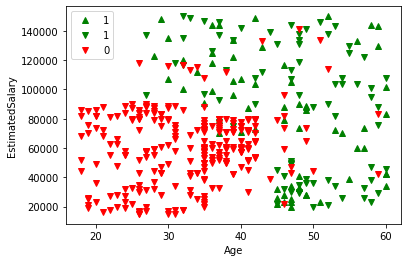

In [29]:
plt.plot(df[(df['Gender'] == 'Male') * (df['Purchased'] == 1)]['Age'],
         df[(df['Gender'] == 'Male') * (df['Purchased'] == 1)]['EstimatedSalary'], 'g^', label='1')


plt.plot(df[(df['Gender'] == 'Female') * (df['Purchased'] == 1)]['Age'],
         df[(df['Gender'] == 'Female') * (df['Purchased'] == 1)]['EstimatedSalary'], 'gv', label='1')


plt.plot(df[df['Purchased'] == 0]['Age'],
         df[df['Purchased'] == 0]['EstimatedSalary'], 'rv', label='0')

plt.legend()
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')

In [30]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [31]:
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


\Delta w_j = (h_i - y_i) * x_(i, j)

In [32]:
y = np.array(df['Purchased'])
df = df.drop('Purchased', axis=1)
X = df.to_numpy()

In [33]:
# z-score normalization
X = (X - X.mean(axis=0)) / (X.std(axis=0))

# min-max normalization
#X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [34]:
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [60]:
model = LogisticRegression()

In [61]:
model.fit(X, y)

LogisticRegression(class_weight=[2, 3])

In [62]:
model.score(X, y)

0.8525

In [59]:
model.coef_

array([[2.45867936, 1.24909615, 0.14482214]])

In [67]:
model.predict_proba(X)


array([[9.98822857e-01, 1.17714281e-03],
       [9.61099062e-01, 3.89009379e-02],
       [9.90939127e-01, 9.06087347e-03],
       [9.82085145e-01, 1.79148554e-02],
       [9.92020889e-01, 7.97911094e-03],
       [9.75350638e-01, 2.46493619e-02],
       [9.56657178e-01, 4.33428221e-02],
       [4.44203754e-01, 5.55796246e-01],
       [9.93023750e-01, 6.97624984e-03],
       [8.79014114e-01, 1.20985886e-01],
       [9.69171492e-01, 3.08285084e-02],
       [9.87768571e-01, 1.22314287e-02],
       [9.86170894e-01, 1.38291058e-02],
       [9.80757619e-01, 1.92423809e-02],
       [9.92152430e-01, 7.84757046e-03],
       [9.24066887e-01, 7.59331128e-02],
       [6.01456509e-01, 3.98543491e-01],
       [6.93319646e-01, 3.06680354e-01],
       [6.29337523e-01, 3.70662477e-01],
       [5.86653316e-01, 4.13346684e-01],
       [7.21208077e-01, 2.78791923e-01],
       [4.73819963e-01, 5.26180037e-01],
       [4.14233681e-01, 5.85766319e-01],
       [7.76045714e-01, 2.23954286e-01],
       [6.677102

In [63]:
h = model.predict(X)
print(np.mean((h == y)))

0.8525


In [64]:
prob = model.predict_proba(X)

In [109]:
print(prob[(y == 0) * (h == 0), 0])

[0.99882286 0.96109906 0.99093913 0.98208514 0.99202089 0.97535064
 0.95665718 0.99302375 0.87901411 0.96917149 0.98776857 0.98617089
 0.98075762 0.99215243 0.92406689 0.97692404 0.98448225 0.90578778
 0.99876942 0.9855592  0.93085072 0.95125593 0.97509957 0.96526086
 0.97628288 0.99246099 0.99528282 0.94748378 0.56019868 0.98868375
 0.94661603 0.99708251 0.96796321 0.98377957 0.88596272 0.99594267
 0.99836154 0.93644329 0.96765086 0.9814826  0.99123512 0.99442005
 0.94000064 0.99780728 0.70843402 0.99302502 0.95846337 0.9898138
 0.98706512 0.99649091 0.98266219 0.99258264 0.94034831 0.96690171
 0.99656958 0.99874842 0.69075398 0.98075762 0.9971298  0.99778322
 0.94127117 0.99620677 0.90720795 0.83063059 0.99598518 0.7141963
 0.96002918 0.98829415 0.94488748 0.95779116 0.8999107  0.98197283
 0.79565023 0.99525458 0.98947414 0.93644329 0.93647597 0.96547364
 0.80553679 0.98855862 0.93506442 0.96848993 0.87350501 0.99905973
 0.9892267  0.99306518 0.9329883  0.95043001 0.69443823 0.712032

In [68]:
h = model.predict_proba(X)[:, 1]
-np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

0.34546308142415627